In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, validation_curve

EDA

In [77]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [79]:
df["cylindernumber"].head()

0    four
1    four
2     six
3    four
4    five
Name: cylindernumber, dtype: object

In [81]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [83]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [89]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [91]:
df = pd.get_dummies(df, columns=['fueltype','aspiration','doornumber','carbody','enginetype','cylindernumber'], drop_first=True)
df.head()

,car_ID,symboling,CarName,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,3,alfa-romero giulia,rwd,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,True,False,False,False,False
1,2,3,alfa-romero stelvio,rwd,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,True,False,False,False,False
2,3,1,alfa-romero Quadrifoglio,rwd,front,94.5,171.2,65.5,52.4,2823,...,False,False,True,False,False,False,True,False,False,False
3,4,2,audi 100 ls,fwd,front,99.8,176.6,66.2,54.3,2337,...,True,False,False,False,False,True,False,False,False,False
4,5,2,audi 100ls,4wd,front,99.4,176.6,66.4,54.3,2824,...,True,False,False,False,True,False,False,False,False,False


In [93]:
df.drop(['drivewheel','car_ID','symboling','CarName','enginelocation','fuelsystem'], axis=1, inplace=True)


In [95]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,True,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,False,False,True,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,True,False,False,False,True,False,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,True,False,False,False,False,True,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,True,False,False,False,True,False,False,False,False,False


In [97]:
X=df.drop(columns=["price"])
Y=df["price"]
print(X.shape)
Y.shape

(205, 32)


(205,)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(143, 32) (62, 32) (143,) (62,)


In [101]:
model = LinearRegression(fit_intercept=True,n_jobs=1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=1)

In [103]:
y_pred = model.predict(X_test)
y_pred

array([30342.88004365, 20696.37424982, 10381.84553306, 13737.86725693,
       26835.08364604,  5792.88126528,  7776.92828369,  7515.36625344,
        9410.20286837,  8547.75302699, 18232.6118113 ,  6344.22326507,
       15757.56449342,  7986.13436613, 42422.07528351,  5866.20334074,
        8251.73557562, 15289.36996686, 10107.42152165, 10806.77147479,
       10596.20269965, 17685.61907354,  8877.87661594,  2695.75772747,
        6969.96689986, 30694.75064849, 15698.79741178, 16684.44072186,
        4537.59651444, 17859.36876865, 27404.87301514,  6089.49671029,
        5851.19829338, 18832.23102719,  8490.28537714, 29321.57418166,
       12118.8625809 , 13287.76426941,  6750.55470997, 15651.65855884,
        7203.73466732, 11939.94688048, 18003.84577146,  5758.4444324 ,
        6650.38950172,  9365.08979377,  6089.49671029,  6724.45087756,
       16954.57505638, 15006.22657781,  5744.98386701, 20976.47076438,
        5958.83757302,  8506.07966898,  4485.36925396, 17224.80605392,
      

In [105]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse,r2)

8314609.406744377 0.8799930146823745


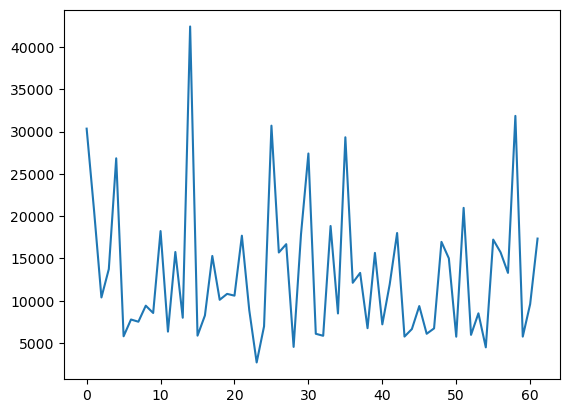

In [107]:
fig = plt.figure()
plt.plot(y_pred);

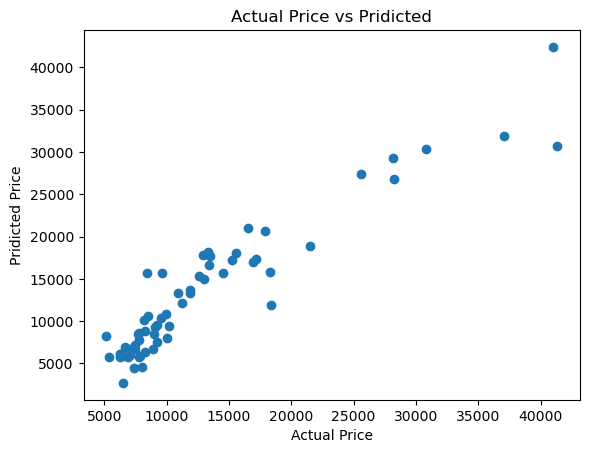

In [109]:
plt.scatter(y_test,y_pred)
plt.ylabel("Pridicted Price")
plt.xlabel("Actual Price")
plt.title("Actual Price vs Pridicted")
plt.show();

In [111]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.head()

,Coefficient
wheelbase,12.289821
carlength,-66.648952
carwidth,477.955085
carheight,167.959177
curbweight,4.017482


In [113]:
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)


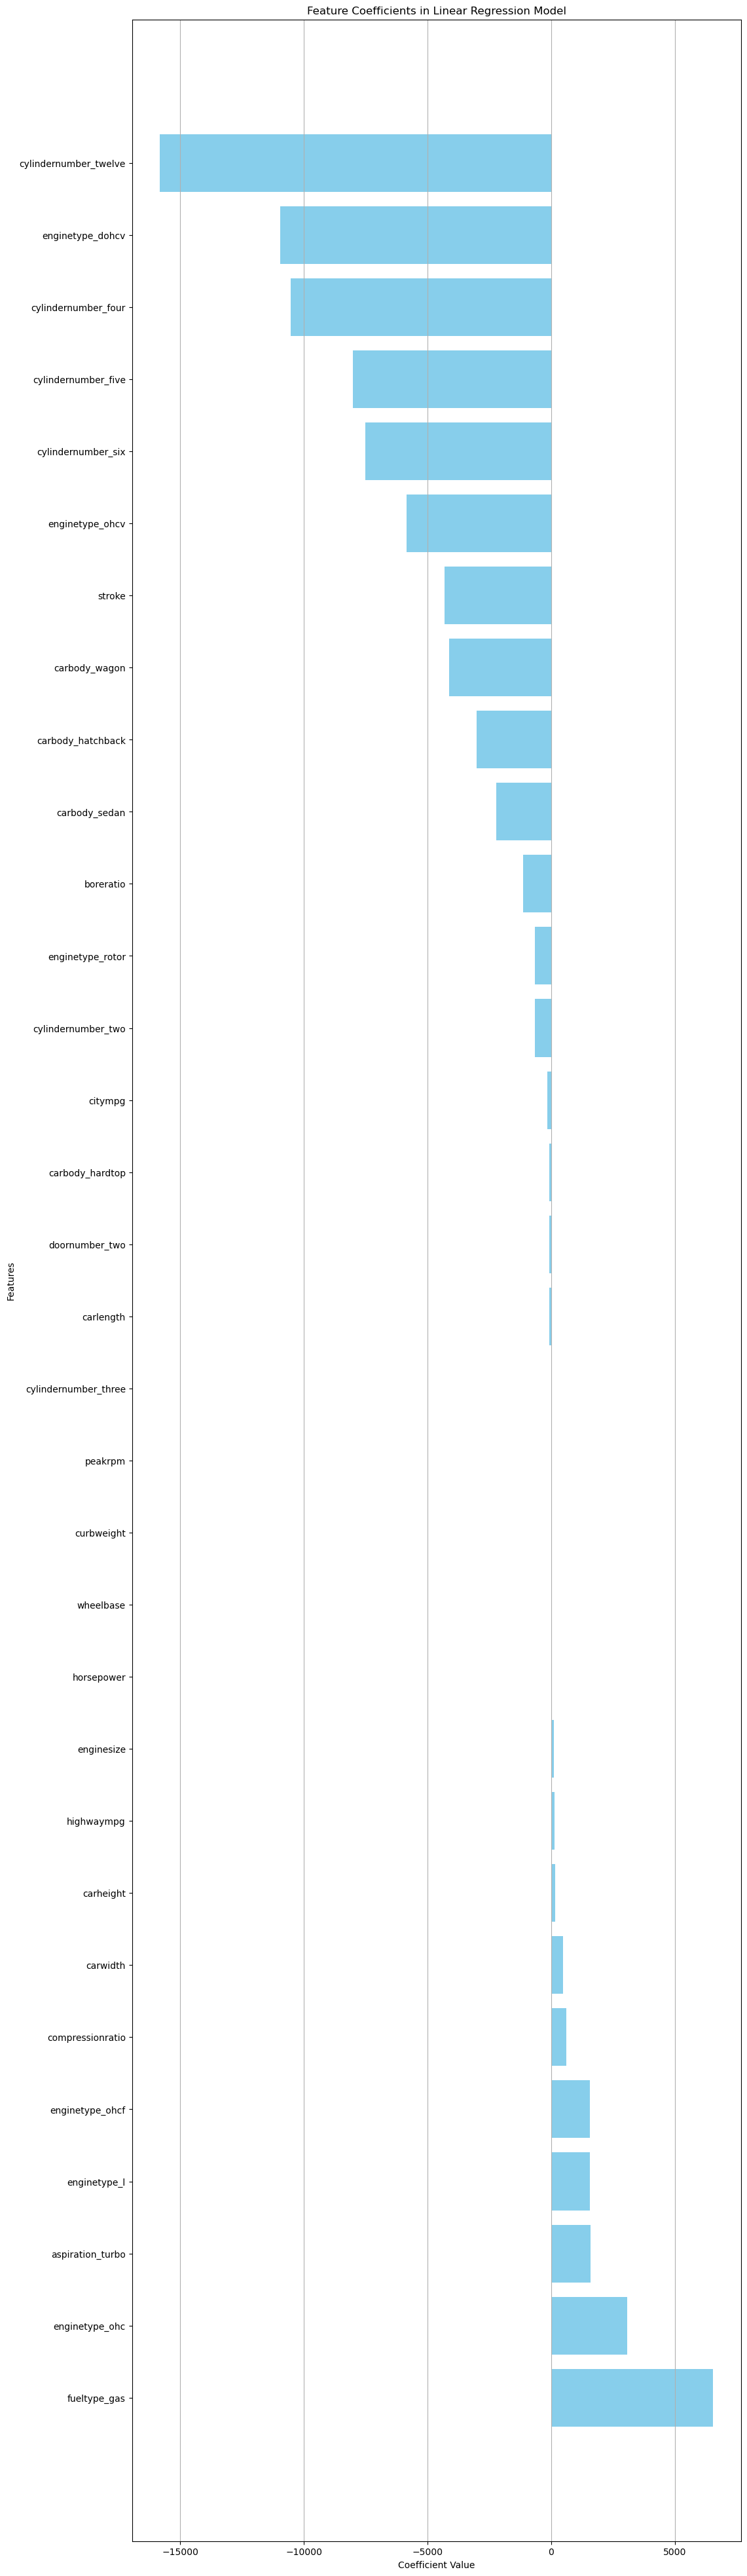

In [115]:
# Plot coefficients
plt.figure(figsize=(12, 50))
plt.barh(coefficients.index, coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Coefficients in Linear Regression Model')
plt.grid(axis='x')
plt.show()